In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [7]:
df.shape

(200, 5)

In [8]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
print(X)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


In [10]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [11]:
import sklearn

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df.drop(columns=["CustomerID"], inplace=True, errors='ignore')
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int32
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


In [15]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [16]:
X=df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
print(X)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


In [17]:
from sklearn.preprocessing import StandardScaler

data=X
scalar=StandardScaler()

scalar.fit(data)


StandardScaler()

In [18]:
scaled_data = scaler.fit_transform(data)

NameError: name 'scaler' is not defined

In [23]:
from sklearn.cluster import KMeans

# Create the KMeans object
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to your data
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [24]:
# Finding optimal number of clusters (Elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

NameError: name 'scaled_data' is not defined

In [25]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

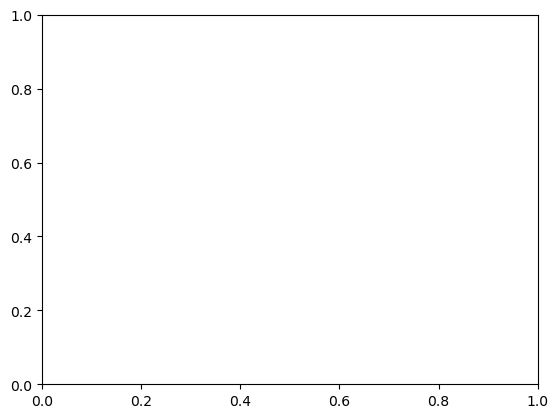

In [26]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Apply KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [27]:
import seaborn as sns

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10')
plt.title("Customer Segments")
plt.show()


ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
scaled_df=scalar.transform(data)
data_scaled = pd.DataFrame(scaled_df, columns=data.columns)

In [30]:
X = data_scaled[['Age','Annual Income (k$)', 'Spending Score (1-100)']]


In [31]:
#There has been 2 methods, elbow and silhotte,
#Im using silhoutte to determine how many cluster i have to use
silhouette_scores = []
K_range = range(2, 11)

In [32]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

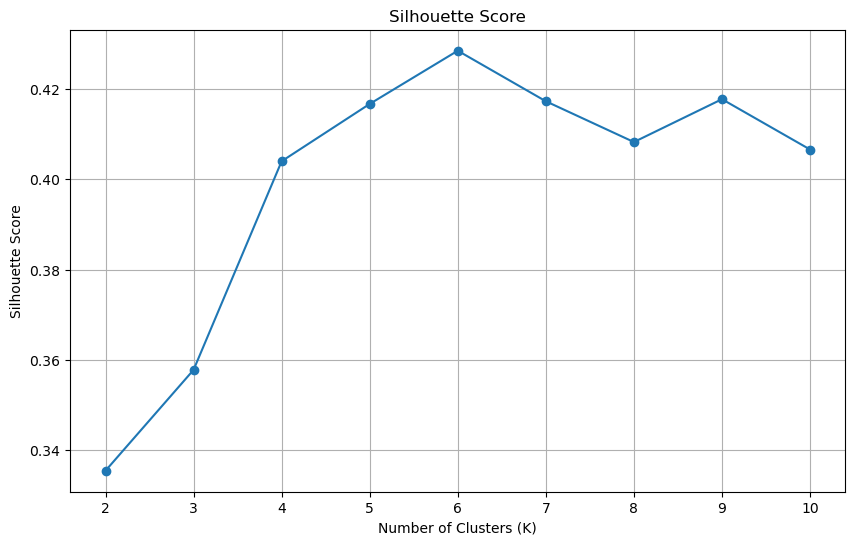

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [34]:
#Then we got 6 as cluster 
optimal_k_silhouette = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters (K) based on Silhouette Score is: {optimal_k_silhouette}")

The optimal number of clusters (K) based on Silhouette Score is: 6


In [35]:
optimal_kmeans = KMeans(n_clusters=optimal_k_silhouette, random_state=42, n_init=10, max_iter=300)
cluster_labels = optimal_kmeans.fit_predict(X)
centroids = optimal_kmeans.cluster_centers_

In [36]:
df['Cluster'] = cluster_labels
data_scaled["Cluster"] = cluster_labels

print("\nDataFrame with Cluster Assignments (based on optimal K):")
print(data_scaled.head())

print("\nCentroid Coordinates (for optimal K):")
print(centroids)


DataFrame with Cluster Assignments (based on optimal K):
        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0 -1.424569           -1.738999               -0.434801        4
1 -1.281035           -1.738999                1.195704        4
2 -1.352802           -1.700830               -1.715913        5
3 -1.137502           -1.700830                1.040418        4
4 -0.563369           -1.662660               -0.395980        5

Centroid Coordinates (for optimal K):
[[ 1.25472096 -0.24021294 -0.04399777]
 [-0.86515664 -0.13196835 -0.08043031]
 [ 0.22171558  1.08322527 -1.29005223]
 [-0.44191719  0.99158305  1.23950275]
 [-0.99396865 -1.34734766  1.06404834]
 [ 0.47895722 -1.30822992 -1.19644353]]


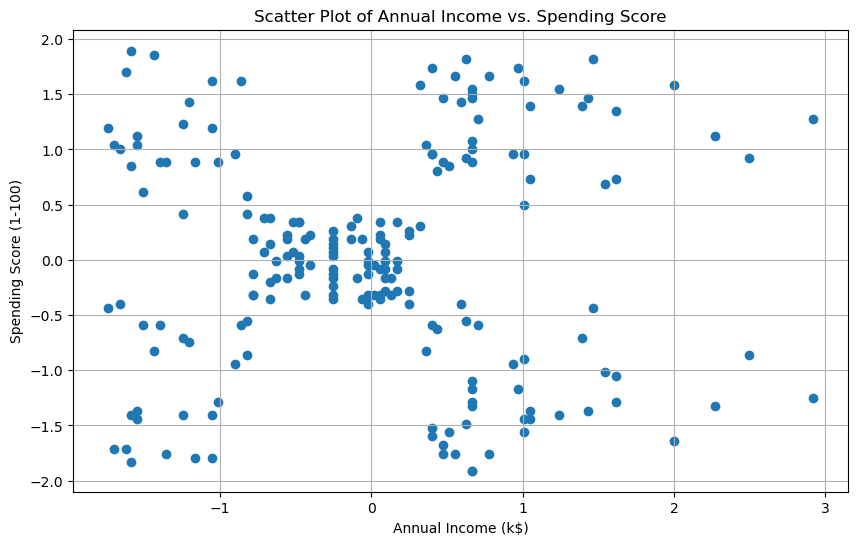

In [37]:
#Representation of scatter plot
plt.figure(figsize=(10,6))
plt.scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.grid(True)
plt.show()

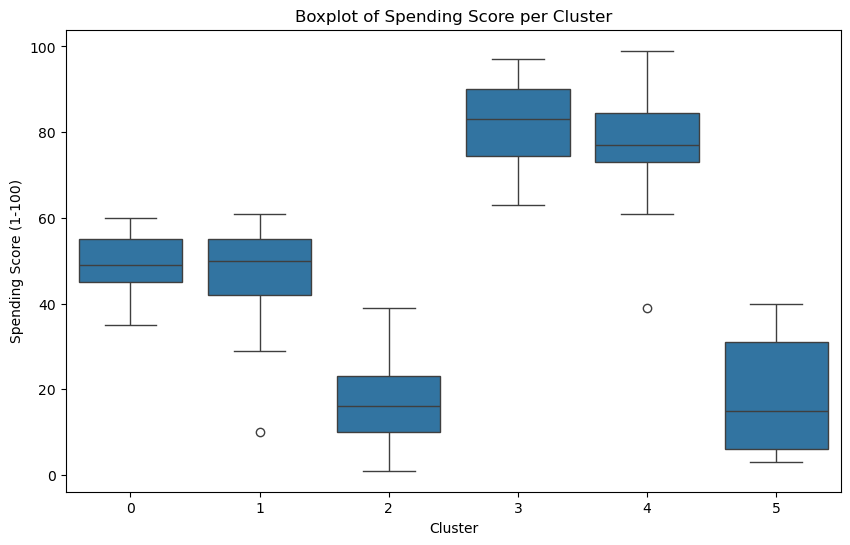

In [38]:
#Representing boxplot to indicates each clusters scores
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.title('Boxplot of Spending Score per Cluster')
plt.show()

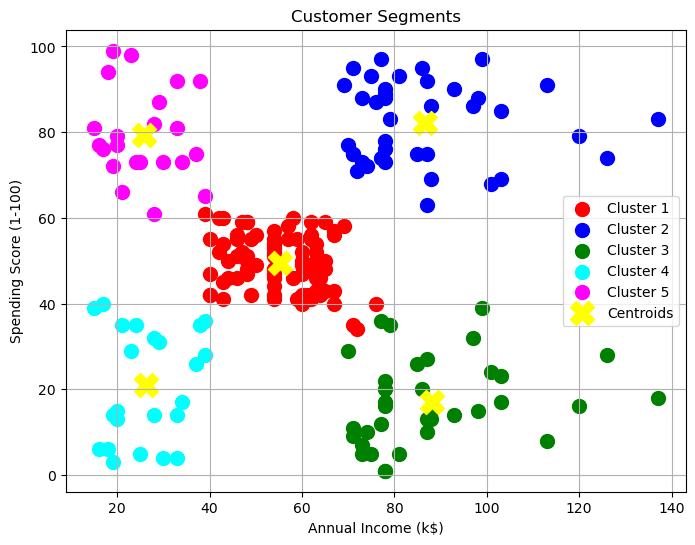

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv("Mall_Customers.csv")

# Convert to NumPy array for KMeans and plotting
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='X')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [41]:
import pickle

with open("k_mean.pkl","wb")as f:
    pickle.dump(optimal_kmeans,f)
with open("scaler.pkl","wb")as f:
    pickle.dump(scalar,f)